# Projekt DS & KI
Gruppenmitglieder: Clemens Fleischhauer, Nils Groetelaers, Nikita Helwer, Carl Placek, Julian Krupp

# Unser Datensatz:

https://archive.ics.uci.edu/dataset/186/wine+quality

# SMART-Ziel:

Wir wollen untersuchen, welchen Einfluss der Alkohol-Prozentgehalt auf die Weinqualität hat. Der UCI-Weindatensatz mit ca. 5000 Weißwein- und ca. 1500 Rotweinproben liefert ausreichend Daten, um erste Schlüsse zu ziehen. Unser Ziel ist die Analyse von Korrelationen und weiteren Zusammenhängen, sowie deren Schilderung und Dokumentation innerhalb der vorgegebenen Zeit (bis 23.11.).

# Quellen:

Titel: Modellierung der Weinqualität anhand physiochemischer Eigenschaften

https://cs229.stanford.edu/proj2019aut/data/assignment_308832_raw/25895690.pdf

Erkenntnisse aus der Quelle: Anhand der vier Größen chlorides, total sulfur dioxide, fixed acidity und pH oder chlorides, total sulfur dioxide, volatile acidity und free sulfur dioxide lässt sich die Weinqualität mithilfe eines Neural Network Models mit einer 99%-igen Sicherheit voraussagen. 

Wir sehen also: Alkohol scheint sich im Vergleich zu anderen Parametern nicht so gut zu eignen, um die Weinqualität vorauszusagen. Daher hat Alkohol vermutlich einen weniger starken Einfluss auf die Weinqualität als die anderen zur Vorhersage benutzten Parameter.

# Aufgabe 1:

In [34]:
# Datensatz Weißwein
import pandas as pd
ww = pd.read_csv('winequality-white.csv', sep=';')
# Duplikate entfernen:
ww = ww.drop_duplicates().reset_index(drop=True)

print(ww.head())

print("=====================================================================================================================================>")

print(ww.columns) # Spaltenermittlung

print("=====================================================================================================================================>")

print(ww.index)    # Zeilenermittlung

print("=====================================================================================================================================>")

ww.describe()

# Datensatz Rotwein
rw = pd.read_csv('winequality-red.csv', sep=';')
# Duplikate entfernen:
rw = rw.drop_duplicates().reset_index(drop=True)

print("=====================================================================================================================================>")

print(rw.head())

print("=====================================================================================================================================>")

print(rw.columns) # Spaltenermittlung

print("=====================================================================================================================================>")

print(rw.index)   # Zeilenermittlung

print("=====================================================================================================================================>")

rw.describe()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Anzahl Zeilen und Spalten und deren Bedeutung

### Datensatz Rotwein (ursprünglich / nach Entfernung der Duplikate)

Anzahl Zeilen: 1599 / 1359

Anzahl Spalten: 12

### Datensatz Weißwein (ursprünglich / nach Entfernung der Duplikate)

Anzahl Zeilen: 4898 / 3961

Anzahl Spalten: 12

### Spalten (gleich für beide Datensätze):

"fixed acidity" = g/L, stabile Säuren, bestimmen den pH-Wert und Geschmack

"volatile acidity" = g/L, in geringen Mengen für Aroma gewünscht, zu viel ist ein Weinfehler

"citric acid" =  g/L, Teil der fixen Säuren, trägt zur Frische bei

"residual sugar" = g/L, unvergorener Zucker im Wein

"chlorides" = g/L, Salze, die den Salzgehalt beeinflussen

"free sulfur dioxide" = mg/L, schützt Wein vor Oxidation und unerwünschten Mikroorganismen

"total sulfur dioxide" = mg/L, Summe aus freiem und gebundenem SO2, Gesamtschutz des Weins

"density" = g/cm3, Dichte des Weins

"pH" = von 1 bis 14, 1 - 7 heißt sauer, 7 - 14 ist basisch

"sulphates" = g/L, Salze der Schwefelsäure, können die Stabilität und Konservierung des Weins beeinflussen

"alcohol" = Alkoholgehalt in Prozent

"quality" = Qualität auf Skala von 1 - 10

### Was fällt auf? ww.describe()

Ausreißer könnten fixed acidity, residual sugar, free sulfur dioxide und total sulfur dioxide sein; der maximale Wert ist teils ein erhebliches Vielfaches des 75%-Perzentil-Wert

keine fehlenden Werte (bereinigt)

# Aufgabe 2:

## Welche Fragestellungen für Ihren Datensatz können Sie mit der Indizierung und Manipulation                                                                                 bzw. Gruppierungsfunktion lösen?

Wie viel Prozent der Weine haben eine Qualität von 8 oder höher? (8 oder höher entspricht einer sehr hohen Qualität)

-> Nur 180 Weißweine und 18 Rotweine haben eine Qualität von 8 oder höher. Das entspricht 198/6497 Weinproben (~ 3,05% aller getesteten Weine).

In [4]:
# Datensatz Weißwein
ww[ww.quality>=8] # 180 Weißweine haben eine Qualität von 8 oder höher. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


In [5]:
# Datensatz Rotwein
rw[rw.quality>=8] # Nur 18 Rotweine haben eine Qualität von 8 oder höher.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


Was ist der durchschnittliche Alkoholgehalt für jede Weinqualität?

- genauer in Ausgabe einsehbar (unten)
- tatsächlich haben qualitativ hochwertige Weine auch höheren Alkoholanteil
- geringere Mengen an hochqualitativen Weinen, d. h. Ausreißer haben stärkere Wirkung

In [6]:
# Datensatz Weißwein
ww_mean_alcohol_for_each_quality = ww.groupby('quality')['alcohol'].mean()

print(f"Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe im Weißwein-Datensatz (Stufe 1, 2, 10 sind im Datensatz nicht vergeben):\n"
      f"\n{ww_mean_alcohol_for_each_quality}")

Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe im Weißwein-Datensatz (Stufe 1, 2, 10 sind im Datensatz nicht vergeben):

quality
3    10.345000
4    10.152454
5     9.808840
6    10.575372
7    11.367936
8    11.636000
9    12.180000
Name: alcohol, dtype: float64


In [7]:
# Datensatz Rotwein
rw_mean_alcohol_for_each_quality = rw.groupby('quality')['alcohol'].mean()

print(f"Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe (Stufe 1, 2, 9, 10 sind im Datensatz nicht vergeben):\n"
      f"\n{rw_mean_alcohol_for_each_quality}")

Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe (Stufe 1, 2, 9, 10 sind im Datensatz nicht vergeben):

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64


## Formulieren Sie Hypothesen.

Der Wert für citric acid muss stets geringer sein als der Wert für fixed acidity.

-> trifft zu, Hypothese bestätigt (siehe unten)

-> fixed acidity - citric acid ist stets größer 0

In [8]:
# Datensatz Weißwein
ww_fa_minus_ca = ww['fixed acidity']-ww['citric acid']
# positiv für alle Proben (logisch, da Zitronensäure eine fixe Säure ist)

print(f"Fixe Acidität minus Zitronensäure (Weißwein):\n"
      f"\n{ww_fa_minus_ca}")

Fixe Acidität minus Zitronensäure (Weißwein):

0       6.64
1       5.96
2       7.70
3       6.88
4       6.88
        ... 
4893    5.91
4894    6.24
4895    6.31
4896    5.20
4897    5.62
Length: 4898, dtype: float64


In [9]:
# Datensatz Rotwein
rw_fa_minus_ca = rw['fixed acidity']-rw['citric acid']
# positiv für alle Proben (logisch, da Zitronensäure eine fixe Säure ist)

print(f"Fixe Acidität minus Zitronensäure (Rotwein):\n"
      f"\n{rw_fa_minus_ca}")

Fixe Acidität minus Zitronensäure (Rotwein):

0        7.40
1        7.80
2        7.76
3       10.64
4        7.40
        ...  
1594     6.12
1595     5.80
1596     6.17
1597     5.78
1598     5.53
Length: 1599, dtype: float64


Hohe volatile acidity weißt auf verdorbenen Wein hin, folglich ist die Qualität niedriger.

- trifft nicht eindeutig zu, Differenz zum Durchschnitt eher gering (siehe unten)
- durchschnittliche Qualität bei hoher volatile acidity (über oder gleich dem 75% Perzentil) liegt in beiden Fällen (bei Rot- und Weißwein) ein wenig unter dem Durchschnitt:
- Weißwein: durchschnittl. Qualität = 5.88, durchschnittl. Qualität bei hoher volatile acidity = 5.72
- Rotwein: durchschnittl. Qualität = 5.64, durchschnittl. Qualität bei hoher volatile acidity = 5.27

Niedrige volatile acidity weißt auf fehlendes Aroma hin, folglich ist die Qualität niedriger.

- trifft auch nicht eindeutig zu, Differenz zum Durchschnitt eher gering (siehe unten)
- durchschnittliche Qualität bei niedriger volatile acidity (unter oder gleich dem 25% Perzentil) liegt in beiden Fällen (bei Rot- und Weißwein) ein wenig über dem Durchschnitt:
- Weißwein: durchschnittl. Qualität = 5.88, durchschnittl. Qualität bei niedriger volatile acidity = 6.11
- Rotwein: durchschnittl. Qualität = 5.64, durchschnittl. Qualität bei niedriger volatile acidity = 6.08

In [10]:
# Datensatz Weißwein
mean_weisswein_high_va = ww[ww['volatile acidity']>=0.32]['quality'].mean() 
# gibt Durchschnittsqualität für alle Weißweinproben mit volatile acidity >= 0.32 g/L aus

mean_weisswein_low_va = ww[ww['volatile acidity']<=0.21]['quality'].mean() 
# gibt Durchschnittsqualität für alle Weißweinproben mit volatile acidity <= 0.21 g/L aus

print(f"Durchschnittliche Qualität bei hoher volatiler Acidität (Weißwein): {mean_weisswein_high_va}\n")

print(f"Durchschnittliche Qualität bei niedriger volatiler Acidität (Weißwein): {mean_weisswein_low_va}")

Durchschnittliche Qualität bei hoher volatiler Acidität (Weißwein): 5.723388848660391

Durchschnittliche Qualität bei niedriger volatiler Acidität (Weißwein): 6.109589041095891


In [11]:
# Datensatz Rotwein
mean_rotwein_high_va = rw[rw['volatile acidity']>=0.64]['quality'].mean() 
# gibt Durchschnittsqualität für alle Rotweinproben mit volatile acidity >= 0.64 g/L aus

mean_rotwein_low_va = rw[rw['volatile acidity']<=0.39]['quality'].mean() 
# gibt Durchschnittsqualität für alle Rotweinproben mit volatile acidity <= 0.39 g/L aus

print(f"Durchschnittliche Qualität bei hoher volatiler Acidität (Rotwein): {mean_rotwein_high_va}\n")

print(f"Durchschnittliche Qualität bei niedriger volatiler Acidität (Rotwein): {mean_rotwein_low_va}")

Durchschnittliche Qualität bei hoher volatiler Acidität (Rotwein): 5.2754342431761785

Durchschnittliche Qualität bei niedriger volatiler Acidität (Rotwein): 6.078817733990148


# Aufgabe 3:

## Bestimmen Sie Lage- und Streuungsmaße der Merkmale in Ihrem Datensatz. Verwenden Sie df.describe()

In [12]:
# Datensatz Weißwein
ww.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
# Datensatz Rotwein
rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(50% = Median, std [standard deviation] = Standartabweichung, mean = Arithmetisches Mittel)

## Haben Sie diese Ergebnisse erwartet?

Im Allgemeinen sind diese Ergebnisse zu erwarten.

## Spannende Erkenntnisse:

- pH ist bei rund 3, was für ein Getränk relativ sauer ist. Ein saurer pH-Wert (kleiner als 7) bei Wein ist allerdings nicht verwunderlich.
- Geringer Effekt des Alkoholgehalts auf die Dichte: Arithmetisches Mittel der Dichte ist rund 1, obwohl durchschnittlich etwa 10% Alkohol im Wein enthalten sind. Die Dichte von Alkohol ist aber bei Raumtemperatur um 20% geringer als die Dichte von Wasser (Ethanol: 0,8 g/cm^3, Wasser: 1 g/cm^3).

## Liegen Mittelwert und Median weit auseinander? Wie groß ist die Streuung?

Median und Mittelwert stehen in fast allen Fällen (bei Weiß- und Rotwein) nah beieinander, was auf eine geringe Streuung hinweist. Ausnahmen sind residual sugar und beide Kategorien des sulfur dioxide: Bei Plan zum späteren Verkauf/Konsum muss sulfur dioxide höher sein, um den Wein lagern zu können. Zucker schwankt aufgrund der Weinsorten stärker, denn ein lieblicher oder halbtrockener Wein enthält mehr Zucker als ein trockener Wein. Leider ist die genauere Weinkategorie nicht im Datensatz angegeben.

# Aufgabe 4:

## Skalenniveaus der Merkmale (Bedeutung von oben ergänzen)

| Merkmal | Skalenniveau | Bedeutung | Einheit |
|---------------|---------------|---------------|---------------|
| fixed acidity | kardinal | stabile Säuren, bestimmen den pH-Wert und Geschmack | g/L |
| volatile acidity | kardinal | in geringen Mengen für Aroma gewünscht, zu viel ist ein Weinfehler | g/L |
| citric acid | kardinal | Teil der fixen Säuren, trägt zur Frische bei | g/L |
| residual sugar | kardinal | unvergorener Zucker im Wein | g/L |
| chlorides | kardinal | Salze, die den Salzgehalt beeinflussen | g/L |
| free sulfur dioxide | kardinal | schützt Wein vor Oxidation und unerwünschten Mikroorganismen | mg/L |
| total sulfur dioxide | kardinal | Summe aus freiem und gebundenem SO2, Gesamtschutz des Weins | mg/L |
| density | kardinal | Dichte des Weins | g/cm^3 |
| pH | kardinal | 1 - 7 heißt sauer, 7 - 14 ist basisch | 1 - 14 |
| sulphates | kardinal | Salze der Schwefelsäure, können die Stabilität und Konservierung des Weins beeinflussen | g/L |
| alcohol | kardinal | Alkoholgehalt | % |
| quality | ordinal / kardinal, wir betrachten es als kardinal | Qualität / Geschmack | 1 - 10 |

# Aufgabe 5:

## Welche Korellationskoeffizienten möchten sie anwenden?
- Bravais-Pearson-Korrelationskoeffizient, da wir hauptsächlich bzw. nur kardinal skalierte Variablen untersuchen

## Prüfen Sie mögliche Zusammenhänge. Waren die Ergebnisse zu erwarten?

In [14]:
kardinal_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [15]:
# Datensatz Weißwein
ww[kardinal_columns].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [16]:
# Datensatz Rotwein
rw[kardinal_columns].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### erwähnenswerte Zusammenhänge im Weißwein - Datensatz:
- fixed acidity - pH (-0.43, denn Menge an Säure im Wein bestimmt pH-Wert)
- residual sugar - total sulfur dioxide (0.40)
- residual sugar - density (0.84, denn gelöster Zucker beinflusst Dichte)
- residual sugar - alcohol (-0.45, denn Zucker gärt zu Alkohol)
- free sulfur dioxide - total sulfur dioxide (0.62, denn free sulfur dioxide ist ein Teil der total sulfur dioxide)
- total sulfur dioxide - density(0.53)
- total sulfur dioxide - alcohol (-0,45)
- density - alcohol (-0,78)
- alcohol - quality (0.44)

### erwähnenswerte Zusammenhänge im Rotwein - Datensatz:
- fixed acidity - citric acid (0.67, denn citric acid ist ein Teil der fixed acidity)
- fixed acidity - density (0.67)
- fixed acidity - pH (-0.68, denn Menge an Säure im Wein bestimmt pH-Wert)
- volatile acidity - citric acid (-0.55)
- volatile acidity - quality (-0.39)
- citric acid - pH (-0.54, , denn Menge an Säure im Wein bestimmt pH-Wert)
- residual sugar - density (0.36, denn gelöster Zucker beinflusst Dichte)
- free sulfur dioxide - total sulfur dioxide (0.67, denn free sulfur dioxide ist ein Teil der total sulfur dioxide)
- density - alcohol (-0.50)
- alcohol - quality (0.48)

Zusammenhänge von z. B. fixed acidity und citric acid (gerade im Rotwein - Datensatz) waren abzusehen, da citric acid ein Bestandteil der fixed acidity ist. Hingegen andere Korrelationen wie z. B. zwischen residual sugar und total sulfur dioxide (Weißwein - Datensatz) sind neue Ergebnisse. Es gibt also sowohl klar absehbare als auch neue Korrelationen.

# Aufgabe 4.2

Erstellen Sie Visualisierungen Ihres Datensatzes - experimentieren Sie mit verschiedenen Diagrammtypen. Welche stellen sich als sinnvoll heraus, welche nicht und was fällt Ihnen auf? Können Sie neue Erkenntnisse gewinnen?

========================================================================>

Ab hier vor allem Code von Nils, Julian usw.

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# numpy und pandas wurden oben schon importiert

quality_ww = ww["quality"]
alcohol_ww = ww["alcohol"]

ax.set_yticks(range(1, 11))
ax.set_xticks(range(16))

x = np.array(alcohol_ww)
y = np.array(quality_ww)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)

fig.suptitle("Weinqualität in Abhängigkeit von Alkoholgehalt (Weißwein-Datensatz)")

plt.xlabel("Alkoholgehalt in %")
plt.ylabel("Weinqualität (0 - 10)")

NameError: name 'ax' is not defined

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# numpy und pandas wurden oben schon importiert

quality_ww = ww["quality"]
alcohol_ww = ww["alcohol"]

quality_rw = rw["quality"]
alcohol_rw = rw["alcohol"]

ax.set_yticks(range(1, 11))
ax.set_xticks(range(16))

x = np.array(alcohol_ww)
y = np.array(quality_ww)

x = np.array(alcohol_rw)
y = np.array(quality_rw)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)

fig.suptitle("Weinqualität in Abhängigkeit von Alkoholgehalt (Rotwein-Datensatz)")

plt.xlabel("Alkoholgehalt in %")
plt.ylabel("Weinqualität (0 - 10)")

NameError: name 'ax' is not defined

# Aufgabe 5.1
## Benford's Law

Analysieren Sie den von Ihnen gewählten Datensatz in Bezug auf Benfords Law - handelt es sich ggf. um synthetische Daten?

(???  Fragen: 1. Diagramme aus der Vorlesung irreführend, da Benford's Law nicht mit log [natürlicher Logarithmus], sondern mit log10 berechnet wird. 2. Soll bei 0.0... immer die erste Zahl ungleich null betrachtet werden?)

Vorgehen für Aufgabe:
1. Lass dir für jede Zelle in beiden Datensätzen die erste Zahl, die nicht null ist, ausgeben und in einen Dataframe/eine CSV-Datei eintragen.
2. Lass dir ausgeben, wie oft jede Zahl von 1 bis 9 in welcher Spalte des neuen Dataframes vorkommt. Rechne anhand dieser Werte die relative Häufigkeit der jeweiligen Zahl in der Spalte aus. Führe das für alle 12 Spalten durch. (Indexierung + Funktionen)
3. Vergleiche die erhaltenen relativen Häufigkeiten mit den theoretischen Häufigkeiten des Benford'schen Gesetzes (siehe Tabelle). Ist die Abweichung sehr groß, deutet das auf synthetische Daten hin.
Überlegung: Macht es Sinn, Benford's Law anzuwenden?

In [19]:
benford = pd.DataFrame(range(1,10,1), columns=['N'])

benford["Benford - Wahrscheinlichkeit"] = np.log10(1+1/benford['N'])
display(benford)

,N,Benford - Wahrscheinlichkeit
0,1,0.301030
1,2,0.176091
2,3,0.124939
3,4,0.096910
4,5,0.079181
5,6,0.066947
6,7,0.057992
7,8,0.051153
8,9,0.045757


In [20]:
# Datensatz Weißwein

wwb = pd.read_csv('ww_benford.csv', sep=';')
wwb_final =  pd.read_csv('ww_benford_final.csv', sep=';')

def calculate_first_num(goal_file, from_dataframe, original_column):
    goal_file[f"1_{original_column}"] = ww[original_column].astype(str).str[0].astype(int)

col_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality'
           ]

for column_name in col_list:
    calculate_first_num(wwb, ww, column_name)

display(wwb)

def calculate_benford(new_file, old_file, new_column):
    new_file[f"bf_{new_column}"] = np.log(old_file[column_name]+1)-np.log(old_file[column_name])

first_num_col_list = ['1_fixed acidity', '1_volatile acidity', '1_citric acid', '1_residual sugar',
            '1_chlorides', '1_free sulfur dioxide', '1_total sulfur dioxide', '1_density',
            '1_pH', '1_sulphates', '1_alcohol', '1_quality'
           ]

for column_name in first_num_col_list:
    calculate_benford(wwb_wwb, column_name)

display(wwb_final)

wwb_final.describe()

,filler,1_fixed acidity,1_volatile acidity,1_citric acid,1_residual sugar,1_chlorides,1_free sulfur dioxide,1_total sulfur dioxide,1_density,1_pH,1_sulphates,1_alcohol,1_quality
0,NaN,7,0,0,2,0,4,1,1,3,0,8,6
1,NaN,6,0,0,1,0,1,1,0,3,0,9,6
2,NaN,8,0,0,6,0,3,9,0,3,0,1,6
3,NaN,7,0,0,8,0,4,1,0,3,0,9,6
4,NaN,7,0,0,8,0,4,1,0,3,0,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,NaN,6,0,0,1,0,2,9,0,3,0,1,6
4894,NaN,6,0,0,8,0,5,1,0,3,0,9,5
4895,NaN,6,0,0,1,0,3,1,0,2,0,9,6
4896,NaN,5,0,0,1,0,2,1,0,3,0,1,7


NameError: name 'wwb_wwb' is not defined

In beiden Datensätzen ist 

# Aufgabe 5.2
Erstellen Sie ein Pairgrid für Ihren Datensatz. Welche Variablen können sinnvoll dargestellt werden? Ergänzen Sie eine Farbcodierung. Welche Variablen eignen sich für die Variation der Farbe? Wie interpretieren Sie die Visualisierung?

Notiz: Vielleicht später Rot- und Weißweindatensatz zusammenfügen, in unterschiedlichen Farben codieren?

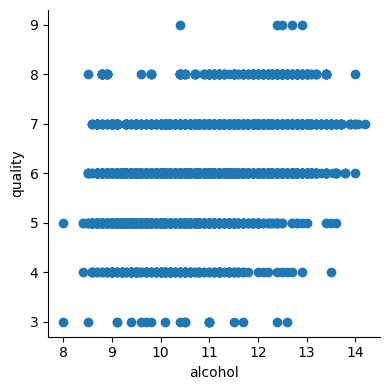

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(ww, height = 4, aspect = 1)
g.map(plt.scatter, "alcohol", "quality")

plt.show()

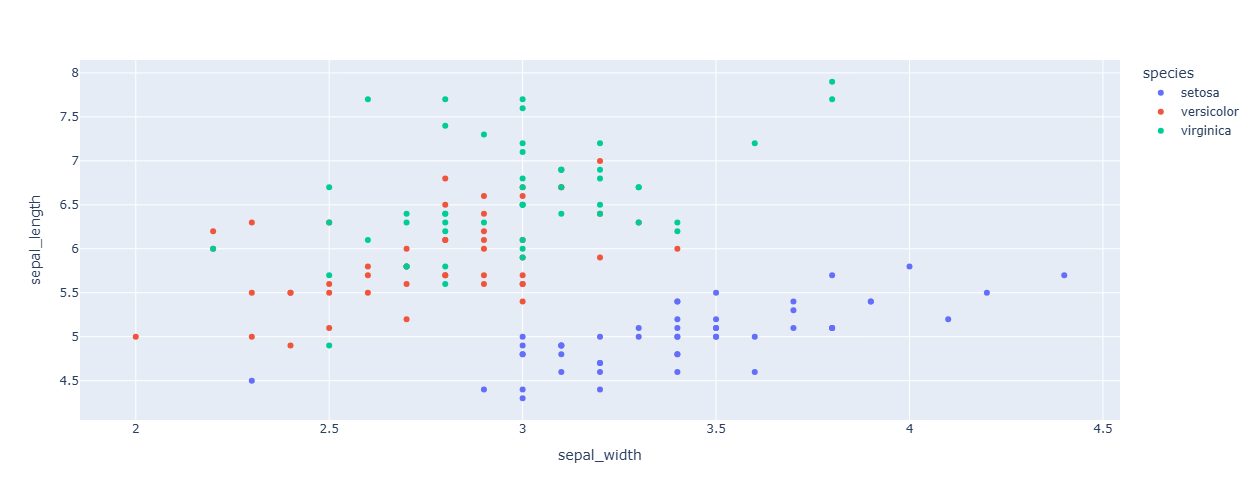

In [4]:
import pandas as pd
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
)
fig.show()

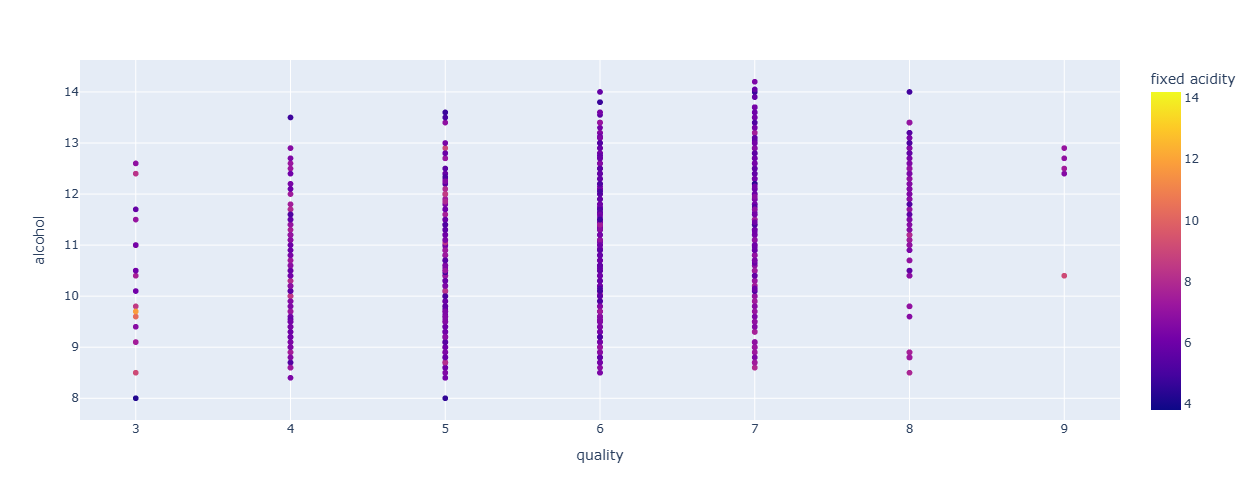

In [12]:
import plotly.express as px
# du hast den Dataframe schon erstellt, kannst einfach 
fig = px.scatter(ww, x="quality", y="alcohol", color="fixed acidity")
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)

fig.show()

# Aufgabe 6.1

## Analysieren Sie den von Ihnen gewählten Datensatz in Bezug auf die Datenqualität.

- keine fehlenden Werte (auf Webseite angegeben, deckt sich mit Erkenntnissen aus df.describe())
- Qualität ist schwer neutral messbar (basierend auf sensorischen Daten)
- Daten scheinen realistisch (Alkohol ca. 10 %, usw.)
- Ursprungsfrage nach Zusammenhang zwischen Alkoholgehalt und Weinqualität ist beantwortbar
- mit 12 Parametern sollte ein Wein schon relativ detailliert beschrieben werden (zusätzlich ist Herkunft bekannt)
- im Betracht unserer Säurewerte (fixed acidity usw.) sind die Daten konsistent (siehe Aufgabe 2 Hypothesen)
- keine unmöglichen Werte vorhanden, erwartbare Verteilung
- Weine sind keine neue Erfindung, 
- meist auf eine oder zwei Kommastellen gerundet, bei kleinen Einheiten in Ordnung

In [12]:
print(ww.isna())
print(ww.dropna())

print(rw.isna())
print(rw.dropna())

# keine NaN-values in beiden Datensätzen

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
4893          False             False        False           False      False   
4894          False             False        False           False      False   
4895          False             False        False           False      False   
4896          False             False        False           False      False   
4897          False             False        False           False      False   

      free sulfur dioxide  

In [14]:
ww.info()
rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

In [25]:
rw[rw["citric acid"] == 0] # 132 Zeilen (zu häufiges Auftreten), kein falscher Messwert

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.0,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.0,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
7,7.3,0.650,0.0,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.5,0.900,0.0,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6
1461,6.2,0.785,0.0,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4
1550,7.1,0.680,0.0,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.5,5
1551,7.1,0.670,0.0,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5


Duplikate

In [28]:
rw[rw.duplicated() == True]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [29]:
ww[ww.duplicated() == True]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [32]:
import pandas as pd

# Angenommen, du hast deinen DataFrame 'ww' bereits bereinigt:
# ww = ww.drop_duplicates().reset_index(drop=True)

# Pfad zur ursprünglichen CSV-Datei
original_csv_path = 'deine_ursprungsdatei.csv'

# 1. Zuerst lädst du die Datei (falls noch nicht geschehen)
# df = pd.read_csv(original_csv_path)

# 2. Dann bereinigst du die Duplikate
# df_bereinigt = df.drop_duplicates().reset_index(drop=True)

# 3. Speichere den bereinigten DataFrame zurück in die Datei
#    WICHTIG: Dies überschreibt die ursprüngliche Datei!
df_bereinigt.to_csv(original_csv_path, index=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
